In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
model = models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),  # Best practice
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])



In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.8175 - loss: 0.5650 - val_accuracy: 0.9835 - val_loss: 0.0572
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9662 - loss: 0.1136 - val_accuracy: 0.9875 - val_loss: 0.0423
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9759 - loss: 0.0810 - val_accuracy: 0.9902 - val_loss: 0.0370
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9790 - loss: 0.0676 - val_accuracy: 0.9910 - val_loss: 0.0328
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9820 - loss: 0.0576 - val_accuracy: 0.9903 - val_loss: 0.0342
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9840 - loss: 0.0524 - val_accuracy: 0.9913 - val_loss: 0.0321
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9846 - loss: 0.0488 - val_accuracy: 0.9932 - val_loss: 0.0269
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9858 - loss: 0.0454 - 

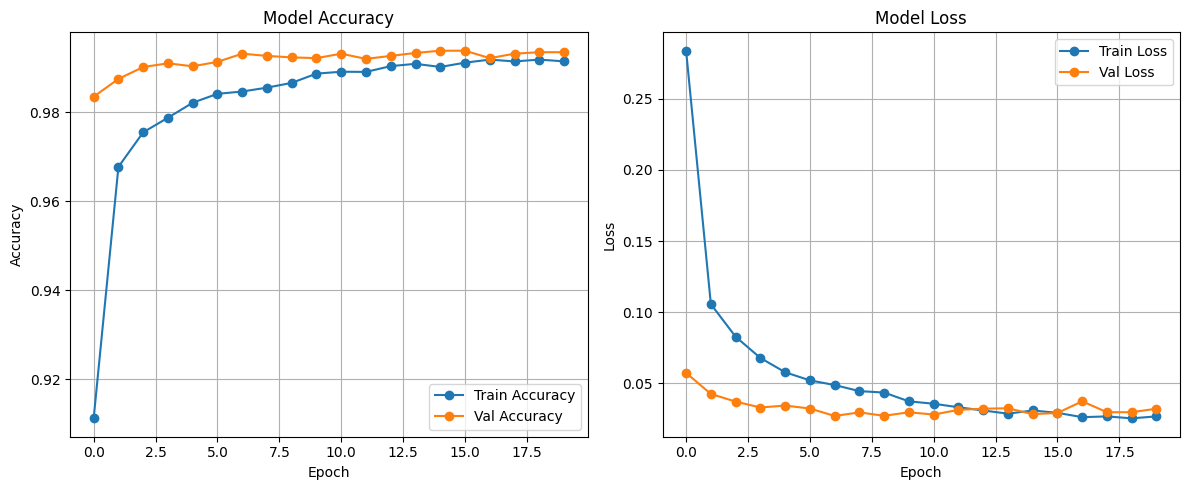

In [6]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
